The AC is placed on branches 3, 7, 11 and 15 of the ASR model. All other config parameters are the same. You can find an experiment config in `logs/ac/train/binary/b11/version_0/hparams.yaml`.

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from os import listdir
from scipy import interpolate

In [9]:
folder = "../../../logs/ac/train/binary"
dataframes = dict()
for f in listdir(folder):
    branch_folder = f"{folder}/{f}"
    for subf in listdir(branch_folder):
        dataframes[f] = {
            "train": pd.read_pickle(f"{branch_folder}/{subf}/dataframes/train.pkl"),
            "val": pd.read_pickle(f"{branch_folder}/{subf}/dataframes/val.pkl")
        }
        break

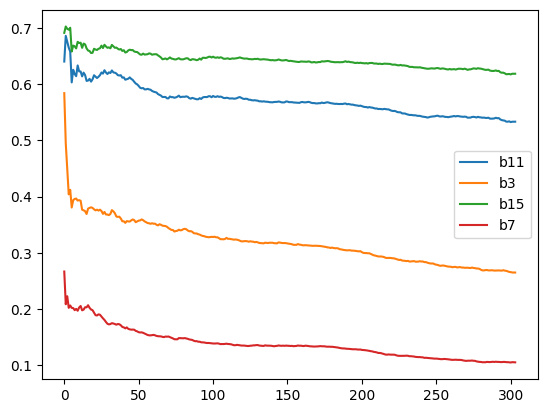

In [10]:
for exp, df in dataframes.items():
    plt.plot(df["train"]["AC Loss"].head(304).rolling(200, min_periods=1).mean(), label=exp)
    plt.legend()

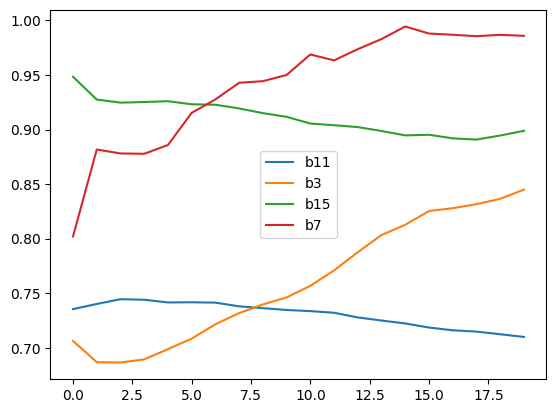

In [11]:
for exp, df in dataframes.items():
    plt.plot(df["val"]["val_ac_loss per correct accent_avg (unweighted)"].head(20).rolling(10, min_periods=1).mean(), label=exp)
    plt.legend()

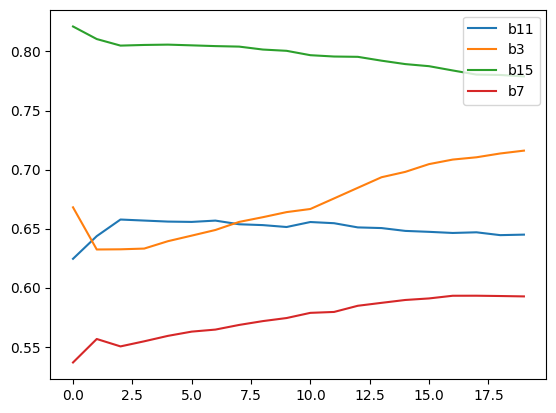

In [12]:
for exp, df in dataframes.items():
    plt.plot(df["val"]["F1-score_avg"].head(20).rolling(10, min_periods=1).mean(), label=exp)
    plt.legend()

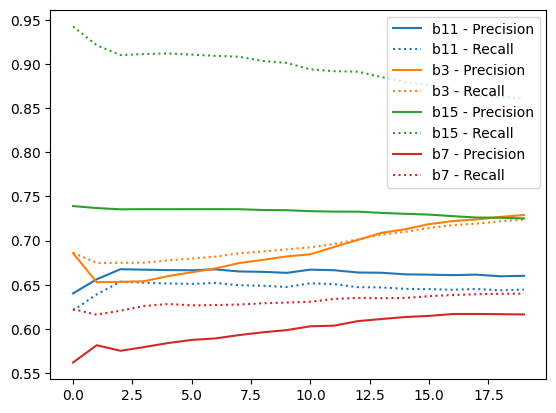

In [13]:
for exp, df in dataframes.items():
    p = plt.plot(df["val"]["Precision_avg"].head(20).rolling(10, min_periods=1).mean(), label=f"{exp} - Precision")
    plt.plot(df["val"]["Recall_avg"].head(20).rolling(10, min_periods=1).mean(), 
        color=p[0].get_color(), linestyle="dotted", label=f"{exp} - Recall")
    plt.legend()

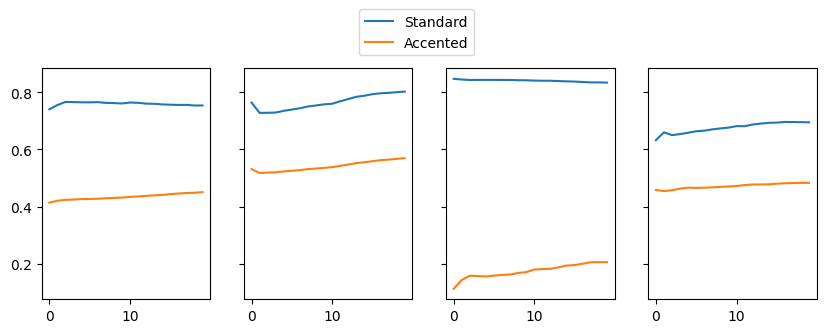

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(10, 3))
for i, (exp, df) in enumerate(dataframes.items()):
    for acc in ["Standard", "Accented"]:
        axes[i].plot(df["val"][f"F1-score_{acc}"].head(20).rolling(10, min_periods=1).mean(), label=acc)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1))

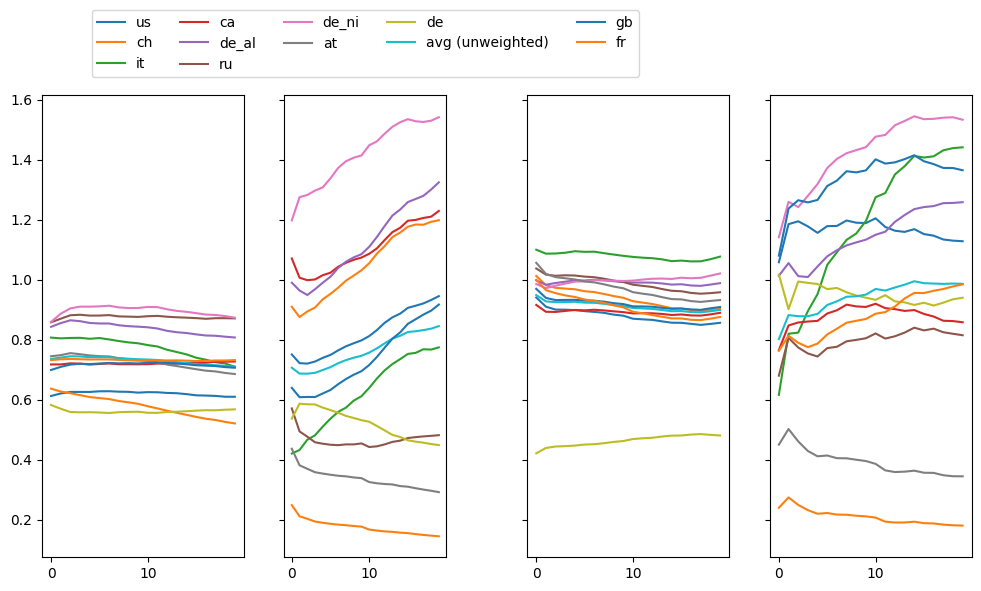

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(12, 6))
for i, (exp, df) in enumerate(dataframes.items()):
    for col in df["val"].columns:
        if "val_ac_loss per" in col:
            axes[i].plot(df["val"][col].head(20).rolling(10, min_periods=1).mean(), label=col[31:])

box = axes[1].get_position()
axes[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5)
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')